# Testing scib metrics on cancer seacells integration with scvi implementation of scib

In [1]:
import scanpy as sc
import pandas as pd
import scvi
from scib_metrics.benchmark import Benchmarker

Global seed set to 0


In [2]:
import configparser

# Read configuration file
config = configparser.ConfigParser()
config.read("../../utils/config.ini")

rawPath = config.get("DEFAULT", "rawPath")

initDir = rawPath + 'integration/metacells/cancer/'

In [3]:
adata_list={'seacells_hdg_patients_batch_corr_scgen_tissuetreat_embeddings_2500.h5ad':'scGen_HVG',
            'seacells_hdg_patients_batch_corr_scgen_tissuetreat_embeddings_HDG.h5ad':'scGen_HDG',
            'seacells_hdg_patients_batch_corr_scVI_tissuetreat_embeddings_2500.h5ad':'scVI_HVG',
            'seacells_hdg_patients_batch_corr_scANVI_tissuetreat_embeddings_2500.h5ad':'scANVI_HVG',
            'seacells_hdg_patients_batch_corr_scVI_tissuetreat_embeddings_HDG.h5ad':'scVI_HDG',
            'seacells_hdg_patients_batch_corr_scANVI_tissuetreat_embeddings_HDG.h5ad':'scANVI_HDG'}

In [4]:
# Load the first AnnData object to store all embeddings
first_file = list(adata_list.keys())[0]
adata_first = sc.read(initDir + first_file)

In [5]:
# Function to get the correct embedding key based on the filename
def get_embedding_key(filename):
    if 'scgen' in filename.lower():
        return 'corrected_latent'
    elif 'scvi' in filename.lower():
        return 'X_scVI'
    elif 'scanvi' in filename.lower():
        return 'X_scANVI'
    else:
        raise ValueError(f"Unknown embedding type for file: {filename}")

In [6]:
# Iterate over each file, load the AnnData object, and extract the embeddings
for file, label in adata_list.items():
    adata = sc.read_h5ad(initDir + file)
    embedding_key = get_embedding_key(file)
    embeddings = adata.obsm[embedding_key]
    adata_first.obsm[label] = embeddings

In [7]:
adata_first

AnnData object with n_obs × n_vars = 9054 × 2500
    obs: 'tissue', 'developmental_stage', 'treatment', 'recurrence', 'tumor_stage', 'paper_ID', 'anatomical_location', 'dataset', 'SEACell', '# Single Cells', 'tissue-treatment', '_scvi_batch', '_scvi_labels', 'concat_batch', 'S_score', 'G2M_score', 'phase'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'dataset_colors', 'neighbors', 'paper_ID_colors', 'pca', 'phase_colors', 'tissue-treatment_colors', 'tissue_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'corrected_latent', 'latent', 'scGen_HVG', 'scGen_HDG', 'scVI_HVG', 'scANVI_HVG', 'scVI_HDG', 'scANVI_HDG'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [8]:
bm = Benchmarker(
    adata_first,
    batch_key="paper_ID",
    label_key="tissue-treatment",
    embedding_obsm_keys = ['scGen_HVG', 'scGen_HDG', 'scVI_HVG', 'scANVI_HVG', 'scVI_HDG', 'scANVI_HDG'],
    n_jobs=-1,
)
bm.benchmark()

Embeddings:   0%|          | 0/6 [00:00<?, ?it/s]WARNING:jax._src.lib.xla_bridge:No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


INFO     Ascites_CHT consists of a single batch or is too small. Skip.                                             
INFO     Primary_CHT consists of a single batch or is too small. Skip.                                             


/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Embeddings:  17%|█▋        | 1/6 [00:52<04:24, 52.94s/it]

INFO     Ascites_CHT consists of a single batch or is too small. Skip.                                             
INFO     Primary_CHT consists of a single batch or is too small. Skip.                                             


/home/marta.sallese/ov_cancer_atlas/miniconda3/envs/scvi/lib/python3.9/site-packages/scib_metrics/_pcr_comparison.py:49: UserWarning: PCR comparison score is negative, meaning variance contribution increased after integration. Setting to 0.
  warnings.warn(
Embeddings:  33%|███▎      | 2/6 [01:32<03:00, 45.07s/it]

INFO     Ascites_CHT consists of a single batch or is too small. Skip.                                             
INFO     Primary_CHT consists of a single batch or is too small. Skip.                                             


Embeddings:  50%|█████     | 3/6 [01:51<01:39, 33.03s/it]

INFO     Ascites_CHT consists of a single batch or is too small. Skip.                                             
INFO     Primary_CHT consists of a single batch or is too small. Skip.                                             


Embeddings:  67%|██████▋   | 4/6 [02:06<00:52, 26.04s/it]

INFO     Ascites_CHT consists of a single batch or is too small. Skip.                                             
INFO     Primary_CHT consists of a single batch or is too small. Skip.                                             


Embeddings:  83%|████████▎ | 5/6 [02:23<00:22, 22.80s/it]

INFO     Ascites_CHT consists of a single batch or is too small. Skip.                                             
INFO     Primary_CHT consists of a single batch or is too small. Skip.                                             


Embeddings: 100%|██████████| 6/6 [02:39<00:00, 26.54s/it]


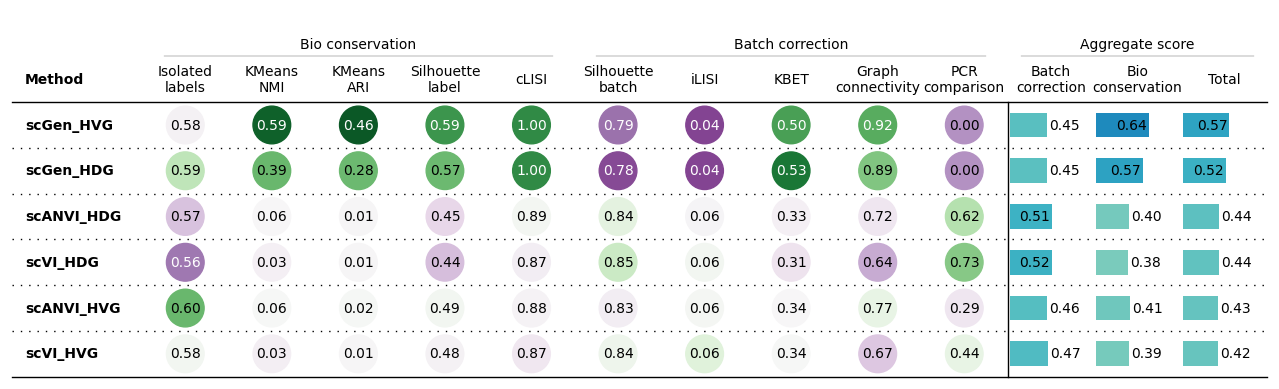

In [9]:
bm.plot_results_table(min_max_scale=False)

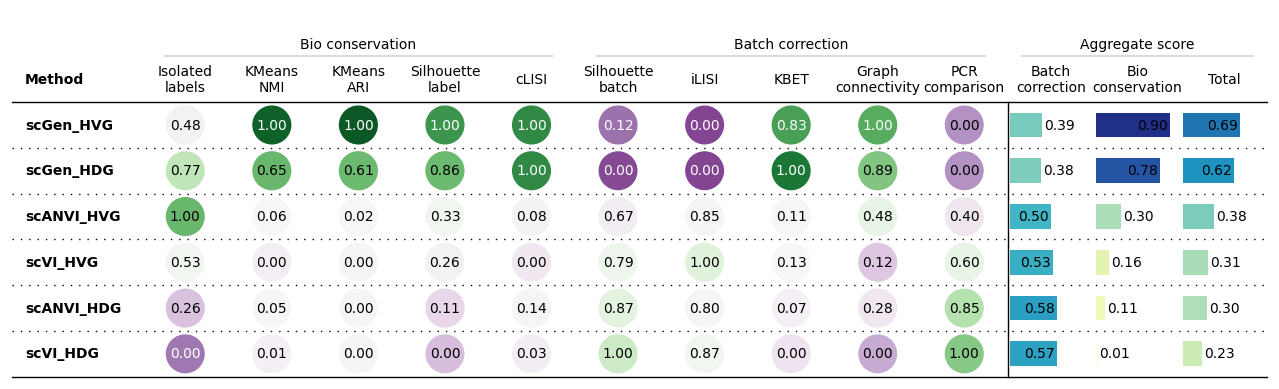

In [10]:
bm.plot_results_table(min_max_scale=True)

In [11]:
df = bm.get_results(min_max_scale=False)
print(df)

              Isolated labels        KMeans NMI        KMeans ARI  \
Embedding                                                           
scGen_HVG            0.581049          0.592709          0.459192   
scGen_HDG            0.592052          0.394471          0.282389   
scVI_HVG              0.58319          0.029099          0.009607   
scANVI_HVG           0.600593          0.061544          0.019888   
scVI_HDG             0.563281          0.034068          0.008873   
scANVI_HDG           0.572802          0.056799          0.009296   
Metric Type  Bio conservation  Bio conservation  Bio conservation   

             Silhouette label             cLISI  Silhouette batch  \
Embedding                                                           
scGen_HVG             0.58738               1.0          0.790931   
scGen_HDG            0.565908               1.0          0.783216   
scVI_HVG             0.475691          0.869021            0.8352   
scANVI_HVG           0.486363    

In [12]:
adata_first.write_h5ad(initDir + 'seacells_cancer_batch_corr_metrics.h5ad')